## MIC的优越性

根据 MIC 的性质，MIC 具有普适性、公平性和对称性。所谓普适性，是指在样本量足够大(包含了样本的大部分信息)时，能够捕获各种各样的有趣的关联，而不限定于特定的函数类型(如线性函数、指数函数或周期函数)，或者说能均衡覆盖所有的函数关系。一般变量之间的复杂关系不仅仅是通过单独一个函数就能够建模的，而是需要叠加函数来表现。所谓公平性，是指在样本量足够大时能为不同类型单噪声程度相似的相关关系给出相近的系数。例如，对于一个充满相同噪声的线性关系和一个正弦关系，一个好的评价算法应该给出相同或相近的相关系数。

## 算法原理

mic 基本原理会利用到互信息概念，互信息的概念使用以下方程来说明：

$$I(x;y)=\int p(x,y) log_2 \frac{p(x,y)}{p(x)p(y)}\mathrm{d}x\mathrm{d}y$$
一般情况下联合概率计算相对来说比较麻烦，要是不记得联合概率可以去这里看看：联合概率

mic 的想法是针对两个变量之间的关系离散在二维空间中，并且使用散点图来表示，将当前二维空间在 x,y 方向分别划分为一定的区间数，然后查看当前的散点在各个方格中落入的情况，这就是联合概率的计算，这样就解决了在互信息中的联合概率难求的问题。下面的公式给出 mic 的计算公式：

$$mic(x;y)=\max_{a*b<B}\frac{I(x;y)}{log_2\min(a,b)}$$
上式中 a,b 是在 x,y 方向上的划分格子的个数，本质上就是网格分布，B 是变量，在原作者的论文当中提到 B 的大小设置是数据量的 0.6 次方左右。

## 具体实现

在Python中的minepy类库中实现了MIC算法，这个我在之前的文章中已经介绍过了。而这里我们则要对其进行可视化。首先我们还是使用UCI的红酒质量数据集。然后利用`minepy.MINE`计算不同特征之间的MIC，然后利用searbon进行矩阵可视化。

**下面是具体实现：**

数据集可以前往[我的Github下载](https://github.com/FontTian/hyperopt-doc-zh/tree/master/tutorials/data)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 从硬盘读取数据进入内存
wine = pd.read_csv("/home/fonttian/Data/UCI/wine/wine.csv")
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
import numpy as np
import pandas as pd
from minepy import MINE


def MIC_matirx(dataframe, mine):

    data = np.array(dataframe)
    n = len(data[0, :])
    result = np.zeros([n, n])

    for i in range(n):
        for j in range(n):
            mine.compute_score(data[:, i], data[:, j])
            result[i, j] = mine.mic()
            result[j, i] = mine.mic()
    RT = pd.DataFrame(result)
    return RT


mine = MINE(alpha=0.6, c=15)
data_wine_mic = MIC_matirx(wine, mine)
data_wine_mic

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.999993,0.137049,0.359700,0.112888,0.104252,0.088545,0.087136,0.331103,0.363157,0.099565,0.091545,0.069389
1,0.137049,0.999859,0.342359,0.064291,0.088238,0.069755,0.075222,0.118709,0.091161,0.114195,0.097584,0.147521
2,0.359700,0.342359,0.999973,0.074586,0.094596,0.071099,0.114753,0.174092,0.228624,0.118638,0.094839,0.084114
3,0.112888,0.064291,0.074586,0.997599,0.098073,0.065086,0.073607,0.215840,0.081221,0.054224,0.076167,0.063269
4,0.104252,0.088238,0.094596,0.098073,0.999919,0.069770,0.093126,0.207912,0.106185,0.094228,0.137368,0.091436
5,0.088545,0.069755,0.071099,0.065086,0.069770,0.999986,0.478336,0.097462,0.061461,0.050779,0.046499,0.042377
6,0.087136,0.075222,0.114753,0.073607,0.093126,0.478336,0.999993,0.128559,0.105838,0.083387,0.123327,0.131426
7,0.331103,0.118709,0.174092,0.215840,0.207912,0.097462,0.128559,0.999997,0.171056,0.139684,0.257593,0.136607
8,0.363157,0.091161,0.228624,0.081221,0.106185,0.061461,0.105838,0.171056,0.999808,0.073231,0.074370,0.046885
9,0.099565,0.114195,0.118638,0.054224,0.094228,0.050779,0.083387,0.139684,0.073231,0.999890,0.118204,0.150187


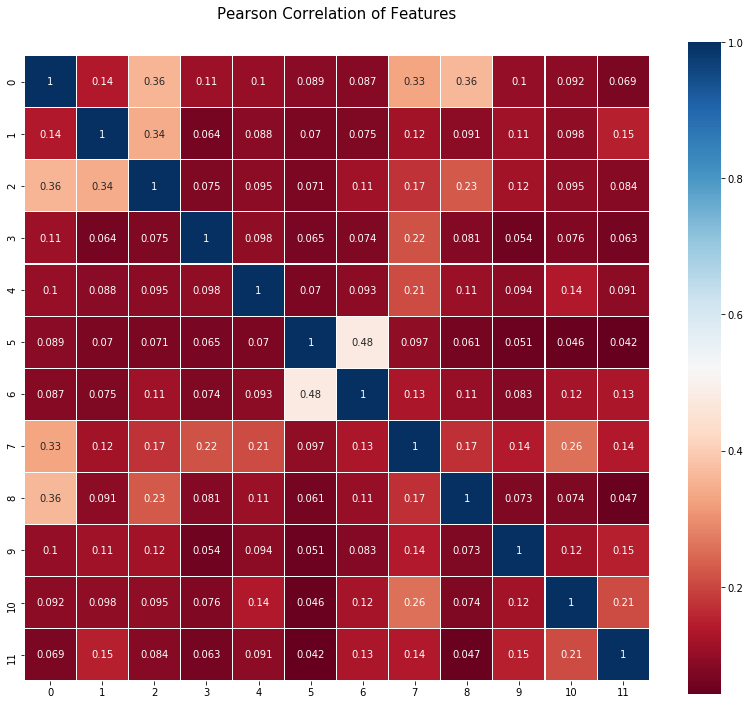

In [7]:
# MIC结果矩阵可视化
import seaborn as sns
%matplotlib inline
def ShowHeatMap(DataFrame):
    import matplotlib.pyplot as plt
    import seaborn as sns
    %matplotlib inline
    colormap = plt.cm.RdBu
    plt.figure(figsize=(14,12))
    plt.title('Pearson Correlation of Features', y=1.05, size=15)
    sns.heatmap(DataFrame.astype(float),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)
    plt.show()
ShowHeatMap(data_wine_mic)

### 一个更负责的例子

下面我们生成一组数据来进行MIC的测试，生成数据的公式来自数据集采用Friedman #1回归数据（这篇[论文](ftp://ftp.uic.edu/pub/depts/econ/hhstokes/e538/Friedman_mars_1991.pdf)中的数据）。数据是用这个公式产生的：



X1到X5是由单变量分布生成的，e是标准正态变量N(0,1)。另外，原始的数据集中含有5个噪音变量 X5,…,X10，跟响应变量是独立的。我们增加了4个额外的变量X11,…X14，分别是X1,…,X4的关联变量，通过f(x)=x+N(0,0.01)生成，这将产生大于0.999的关联系数。关于特征选择的Bryan__ 也有一篇不错的文章-[结合Scikit-learn介绍几种常用的特征选择方法](https://blog.csdn.net/bryan__/article/details/51607215 )，下面的数据生成代码就是从这篇文章中的代码修改而来的。

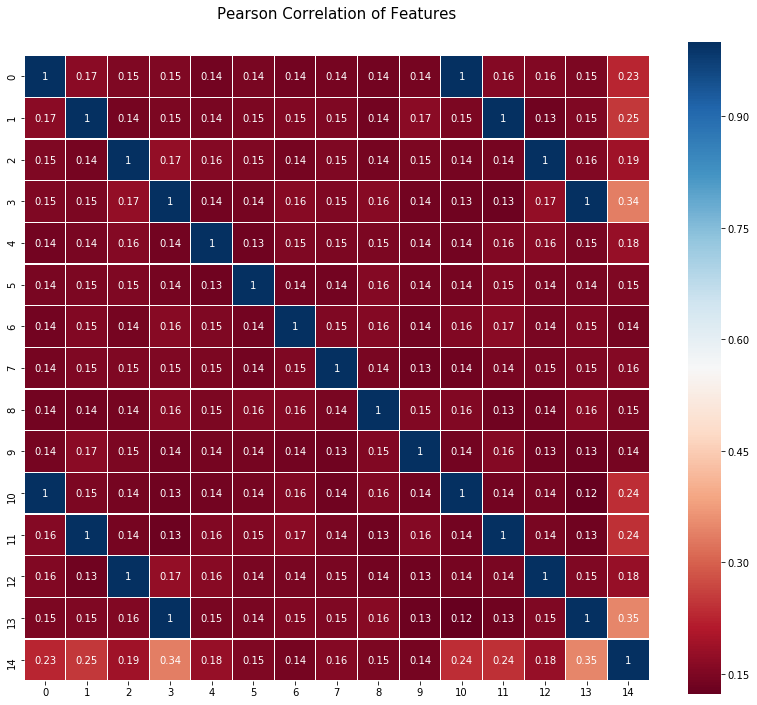

In [13]:
# 固定随机数，以确保每次生成的随机数固定
np.random.seed(42)

size = 750
X = np.random.uniform(0, 1, (size, 14))

#"Friedamn #1” regression problem
Y = (10 * np.sin(np.pi * X[:, 0] * X[:, 1]) + 20 * (X[:, 2] - .5)**2 +
     10 * X[:, 3] + 5 * X[:, 4] + np.random.normal(0, 1))
#Add 3 additional correlated variables (correlated with X1-X3)
X[:, 10:] = X[:, :4] + np.random.normal(0, .025, (size, 4))

names = ["x%s" % i for i in range(1, 15)]

# 构建生成DF数据集
Friedman_regression_data = pd.DataFrame(X)
Friedman_regression_data['y'] = Y

# 获取MIC矩阵
mine = MINE(alpha=0.6, c=15)
data_wine_mic = MIC_matirx(Friedman_regression_data, mine)
# 进行结果可视化
ShowHeatMap(data_wine_mic)

**代码与结果解读**
首先固定随机数，以确保每次生成的随机数固定。然后生成一个750行，10列取值范围在0-1内的随机矩阵。之后按照"Friedamn #1"生成Y，并将X的前四列，增加随机项，生成11-14项特征。

之后就是将numpy数组修改为dataframe数组，并传入MIC矩阵的计算函数，最终进行seaborn进行矩阵可视化。

结果非常不错除了中间特征与自己本身的高度相关之外。我们可以很明显的发现第1-4特征与第11-14项特征MIC为1.这已经充分证明了MIC优秀的性能。



## 参考文章
 1. [Maximal Information Coefficient (MIC)最大互信息系数](https://blog.csdn.net/u014271612/article/details/51781250)
 2. [最大信息系数方法](https://www.deeplearn.me/1466.html)
 3. [结合Scikit-learn介绍几种常用的特征选择方法](https://blog.csdn.net/bryan__/article/details/51607215 )